<a href="https://colab.research.google.com/github/apschisky/programacao_pos/blob/main/Ovitrampas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# obtendo acesso ao google colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# instalação da biblioteca contextily para colocar um mapa base
# instalação da biblioteca matplotlib-scalebar para inserir a escala no mapa
!pip install contextily -q
!pip install matplotlib-scalebar -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 38.1 MB/s eta 0:00:00


In [3]:
# importando as bibliotecas para a análise e manipulação dos dados
# (se der erro em alguma importação poderá ser necessário a instalação da mesma através do comando !pip install biblioteca_que_deu_erro -q)
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
# Carregar os arquivos shapefile
# pode copiar o caminho do arquivo desde que ele já esteja em alguma pasta no google drive, e colar no lugar desses caminhos.
lotes = gpd.read_file('/content/drive/MyDrive/Pos Geo UFABC/dados/lotes.shp')
ovitrampas = gpd.read_file('/content/drive/MyDrive/Pos Geo UFABC/dados/ovitrampas.shp')

# variável que contém o valor da coluna que foi criado no shapefile com o total da coleta para o mês de Janeiro de 2024
ovitrampas_tot = ovitrampas['T_Ovos']

Text(0.5, 1.0, 'Coleta Ovitrampas Janeiro 2024')

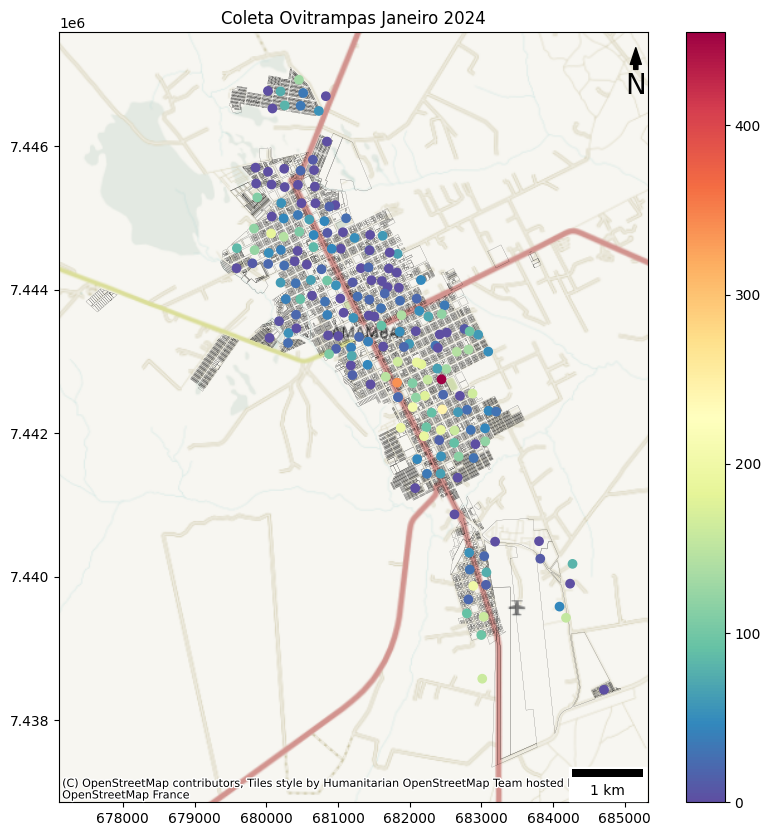

In [32]:
# variáveis usadadas para a plotagem do mapa, nela contém a dimensão do mapa
fig,eixo = plt.subplots(figsize=(10,10))

# plotando a camada lotes da base de dados, somente as linhas com as características
# cor preta, espessura 0.1 foi o que eu achei melhor, mas dá pra mudar
# o argumento ax pega o valor da variável eixo para o mapa ser desenhado
# zorder foi adicionado para ordenar as camadas em prioridade
lotes.boundary.plot(color = ('k'), linewidth = 0.1, ax=eixo, zorder = 4)

# na camada ovitrampas foi definida a coluna ovitrampas_tot que criei
# no intuito de mostrar o total da coleta dos ovos no mês de janeiro 2024
# argumento cmap coloca a ordem das cores que serão apresentados
# a legenda ativada e também com ordem de prioridade
ovitrampas.plot(column= ovitrampas_tot, ax=eixo, cmap="Spectral_r", legend=True, zorder = 5)

# inserindo o mapa base
cx.add_basemap(ax=eixo, crs=ovitrampas.crs, zorder = 0)

#inserindo a barra de escala
eixo.add_artist(ScaleBar(dx=1, location='lower right'))

# inserindo a seta do norte
# As variáveis x, y definirão a posição da ponta da seta em termos de porcentagem
x, y = 0.98, 0.98

# a variável arrow_lengh definirá o comprimento da seta nesse caso 5%
arrow_length = 0.05

''' aqui será definido texto: 'N'
o parâmetro xy irá receber as coordenadas x e y que foram definidas anteriormente
O parâmetro xytext  irá receber a posição do texto, e ficará o eixo y a mesma no eixo X e 5% do eixo y abaixo da ponta da seta (arrow_length=0.05)
Definindo o parâmetro arrowprops e então é passado alguns argumentos para estilizar
Ao definir 'center' para os parâmetros ha e va, a seta e o texto ficarão alinhados.
O tamanho do texto é definico em fontsize  que no caso foi 20 e a cor preto
Em xycoords, passamos ax.transAxes, ele permite passarmos as coordenadas em frações dos eixos.

'''
eixo.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='k', width=3, headwidth=8),
            ha='center', va='center', fontsize=20, color='k',
            xycoords=eixo.transAxes)

# Definindo o título do mapa
eixo.set_title('Coleta Ovitrampas Janeiro 2024')

In [33]:
# definindo o camilnho a ser salvo uma imagem JPG (pode ser um caminho na própria máquina quanto no google drive)
caminho='/content/drive/MyDrive/Pos Geo UFABC/dados/Coleta_Ovitrampas_2024' +'.jpg'



In [35]:
#salvado a imagem passando como parâmetros o caminho a ser salvo e o dpi
fig.savefig((caminho), dpi=1200)